In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_loan = pd.read_csv('Project9_Loan_Prediction.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


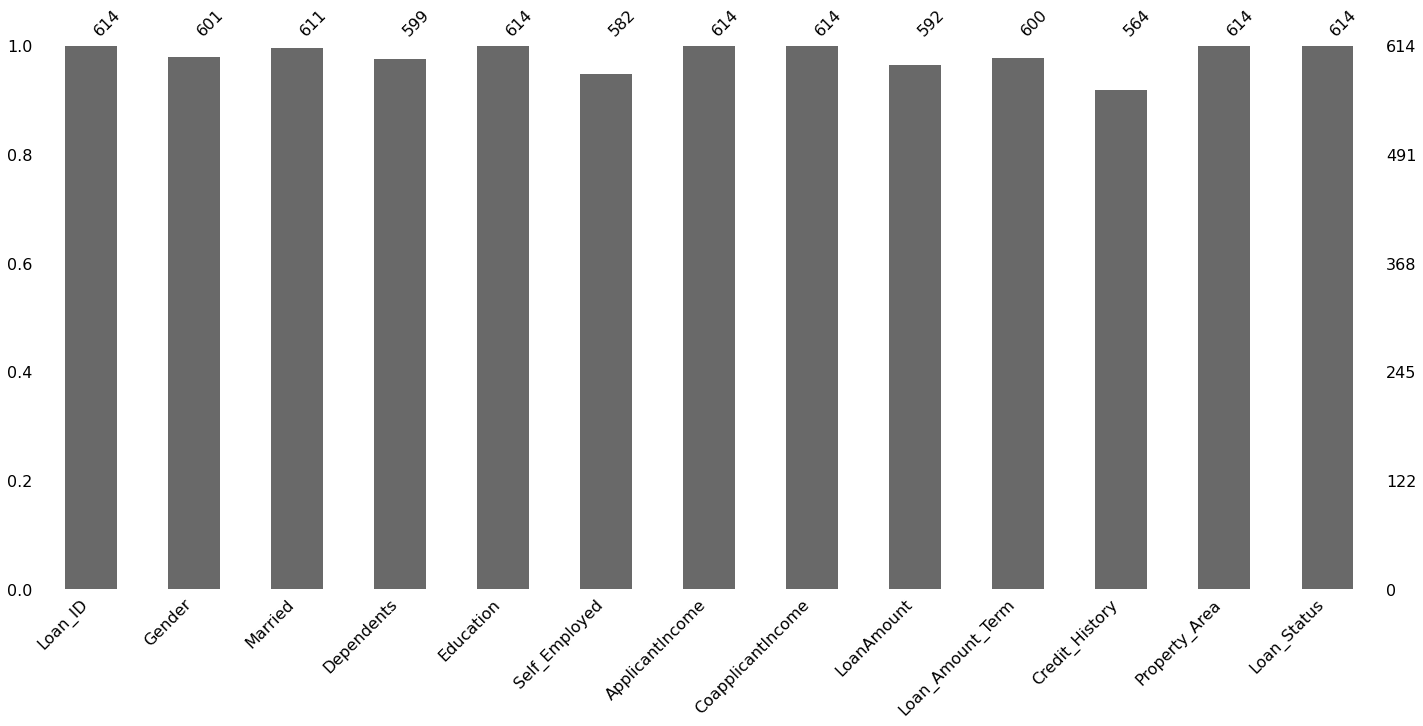

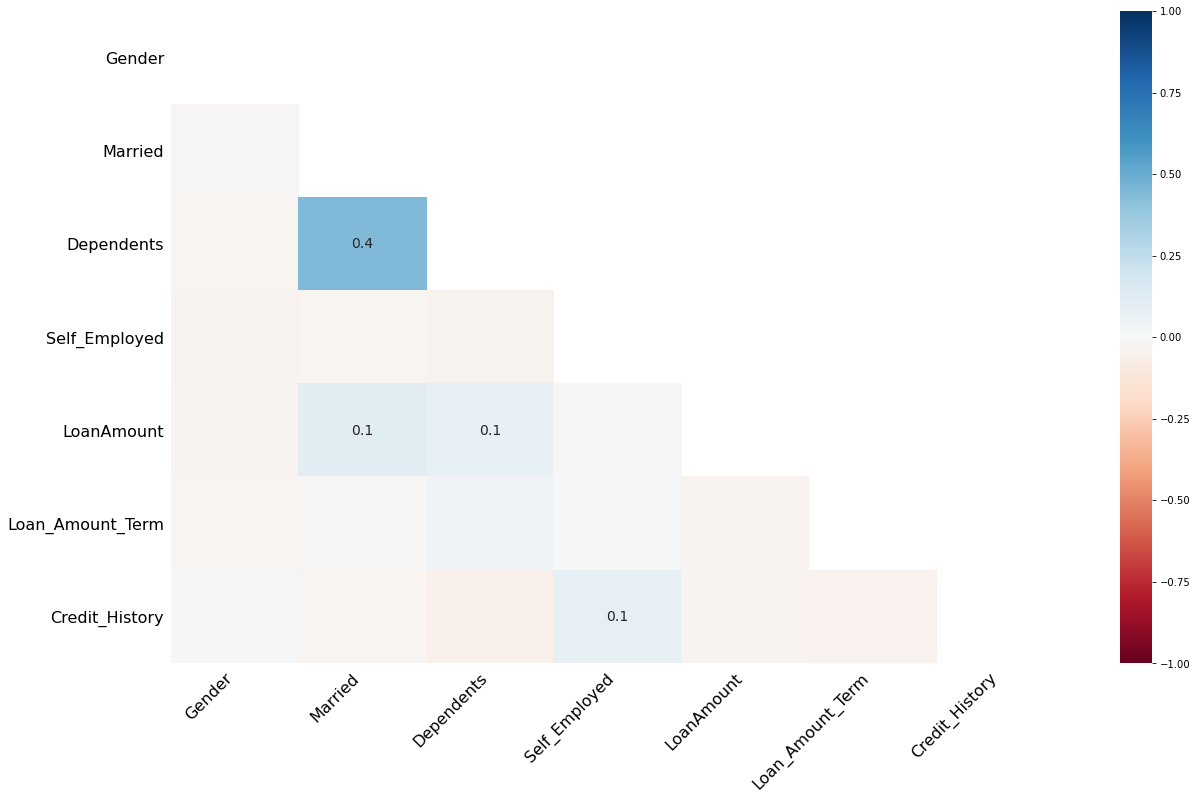

In [6]:
import missingno as msno
msno.bar(df_loan)
msno.heatmap(df_loan)

# Gender, Married, Dependents, Education, Self_Employed, Loan_Amount,Loan_amount_Term and Credit_History have null values

In [7]:
for col in df_loan.columns:
    print('\n' ,col,'*************************************\nUnique values : ',df_loan.loc[:,col].unique(),'\n\n\nValue Counts : ',df_loan.loc[:,col].value_counts(),'\n\n\n')
    


 Loan_ID *************************************
Unique values :  ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP00127

In [8]:
from sklearn.impute import SimpleImputer

si_ctg = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
si_con = SimpleImputer(missing_values = np.nan, strategy = 'mean')

lst_ctg = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
#For columns with categorical data
for col in lst_ctg:
    df_loan.loc[:,col] = si_ctg.fit_transform(df_loan.loc[:,col].to_numpy().reshape(-1,1))

#For columns with continous data
df_loan.loc[:,'LoanAmount'] = si_con.fit_transform(df_loan.loc[:,'LoanAmount'].to_numpy().reshape(-1,1))

Null values in all columns :

 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


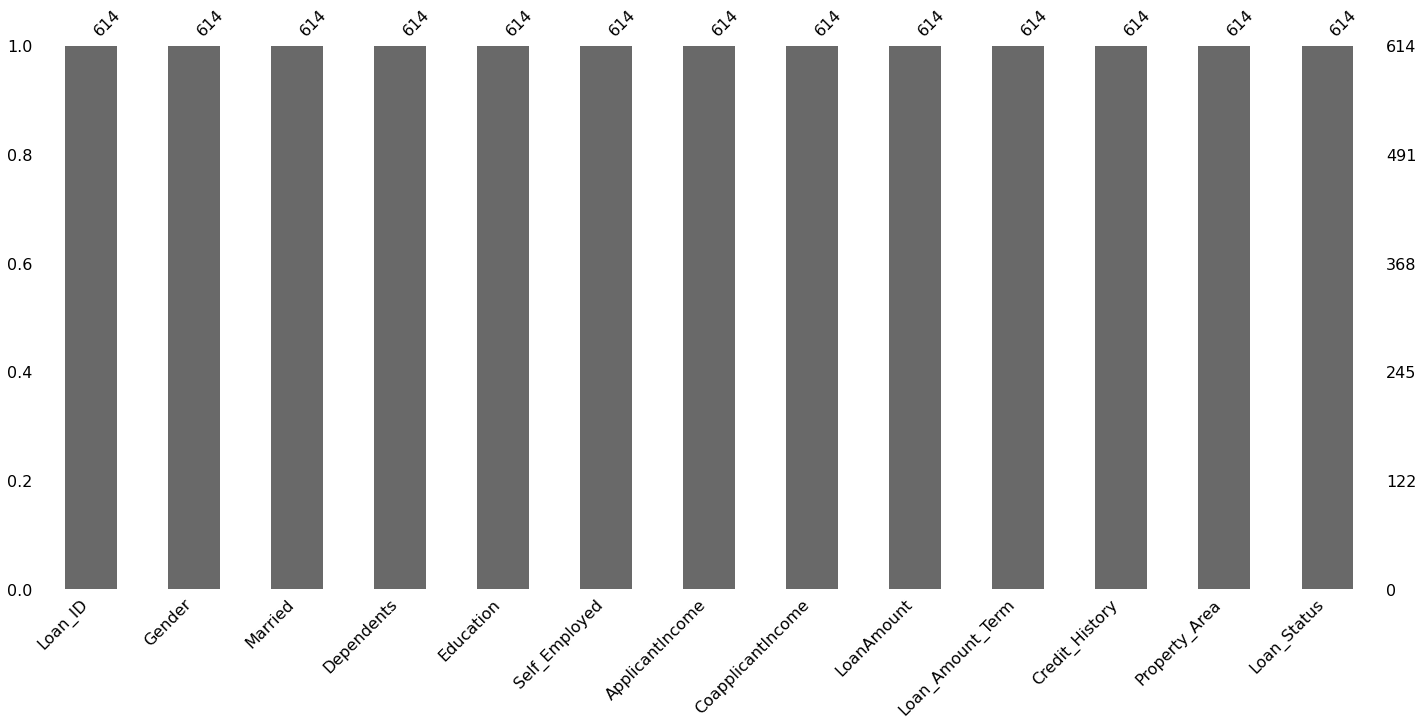

In [9]:
#Checking null values
msno.bar(df_loan)
print('Null values in all columns :\n\n',df_loan.isnull().sum())

In [10]:
#Let's check the datatype of each columns now
df_loan.dtypes

#Use replace() for Dependents
df_loan.drop(columns = 'Loan_ID', inplace=True)

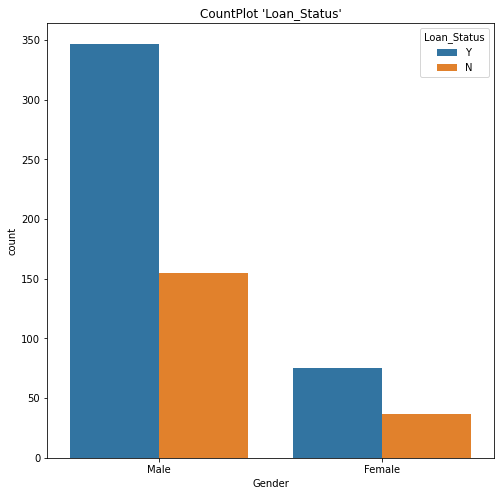

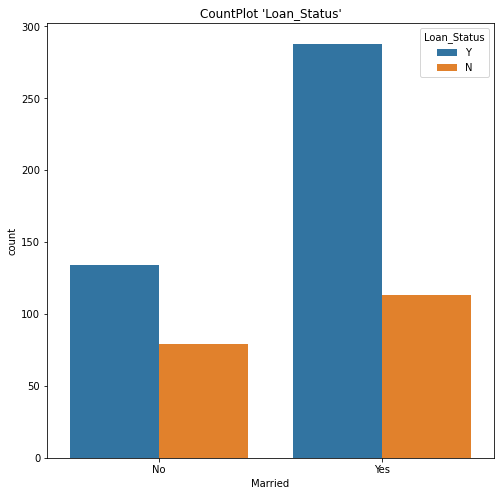

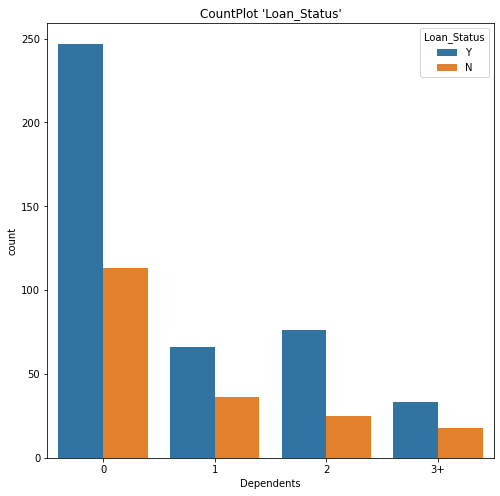

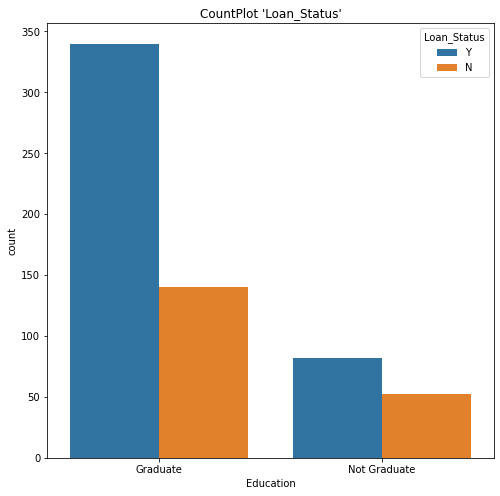

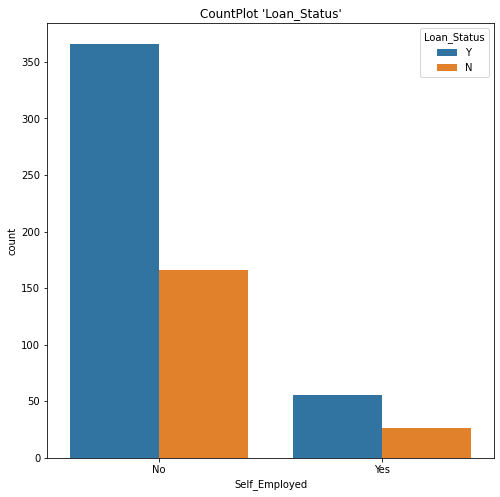

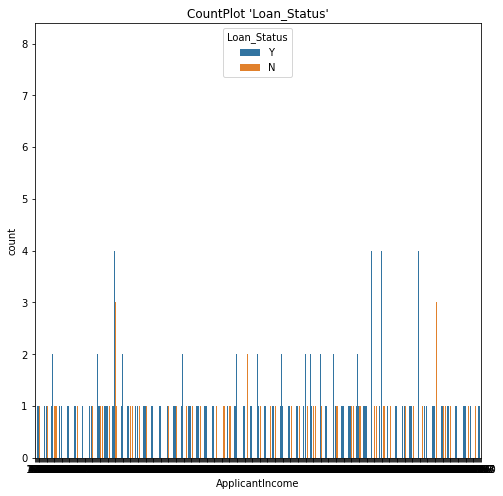

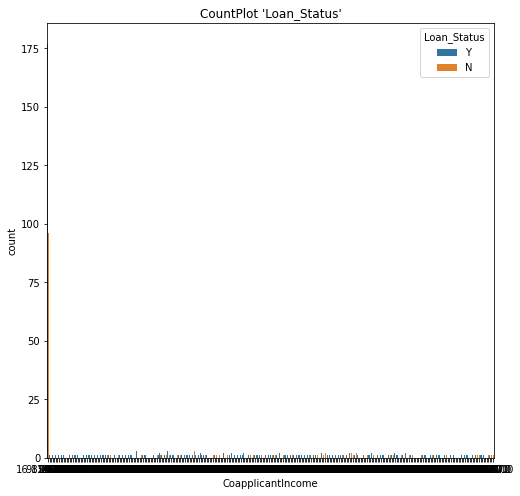

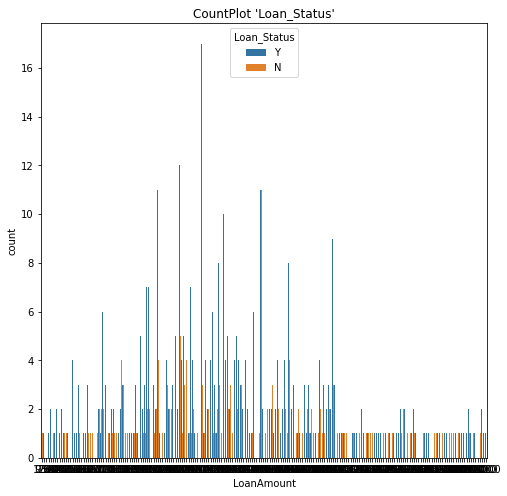

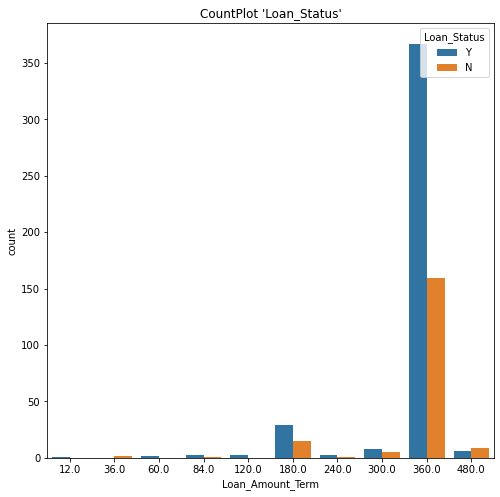

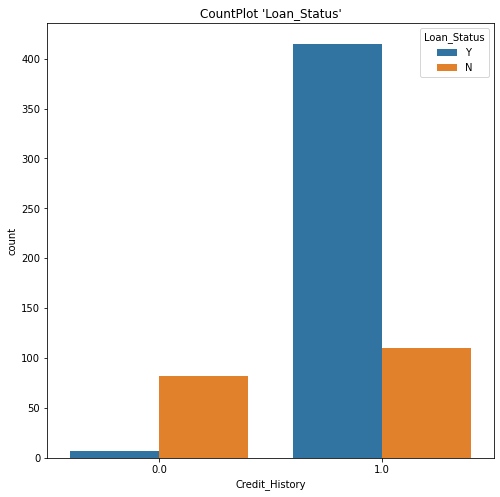

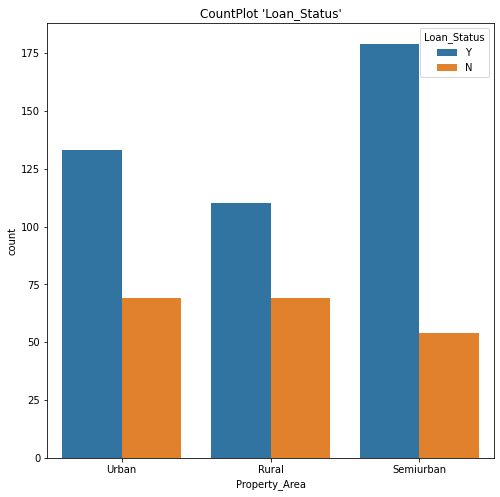

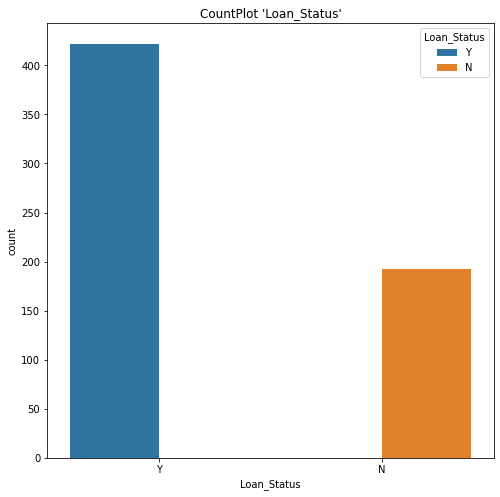

In [11]:
#Let's get some important insights from the data
#DATA VISUALIZATION

for col in df_loan.columns:
    if ((col != 'LoanAmount') or (col !='LoanIncome') or (col != 'CoapplicantIncome') or (col !='ApplicantIncome')):
        plt.figure(figsize=(8,8))
        plt.title("CountPlot 'Loan_Status'")
        sns.countplot(x=col,hue='Loan_Status', data=df_loan)
        plt.show()

In [12]:

#1 -- Most people are getting loans for both male and female
#2 -- More married couples coming for loan then singles 
#3 -- Graduates are getting more loan than non graduates
#4 -- Majority are looking for loan period for a year and for those looking for more than that are getting rejected
#5 -- Without good credit score very few gets loan 
#6 -- People with property in 'Semiuraban' area are getting loans easily than others


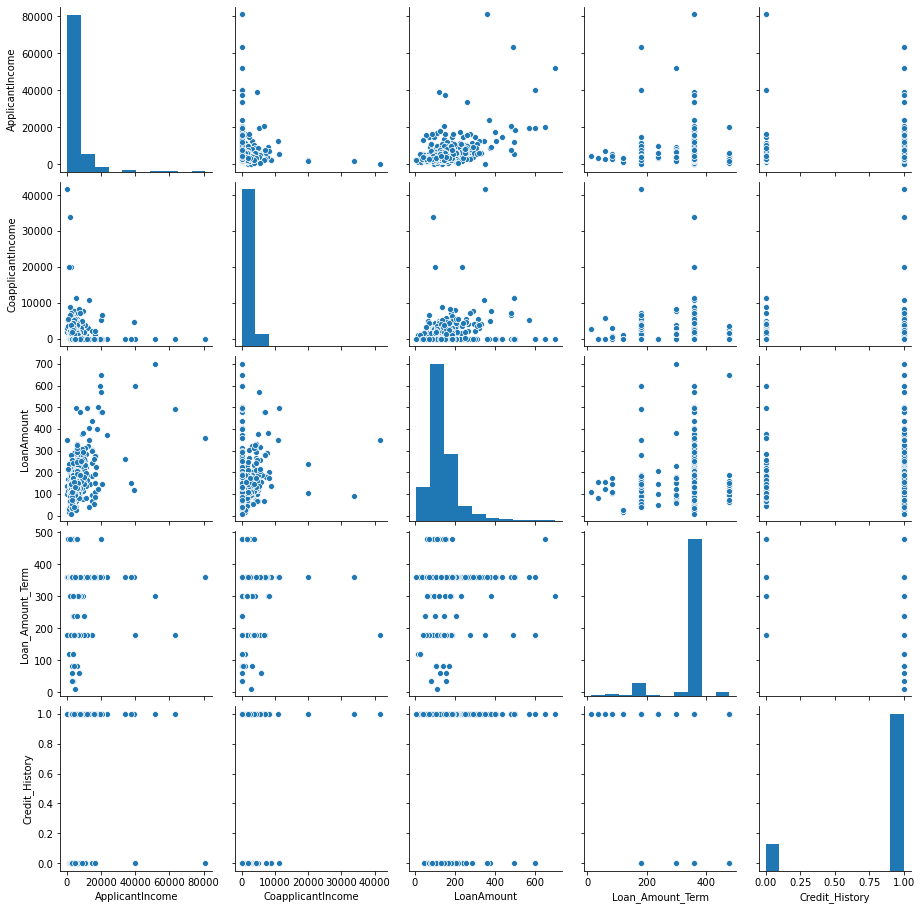

In [13]:
sns.pairplot(df_loan)

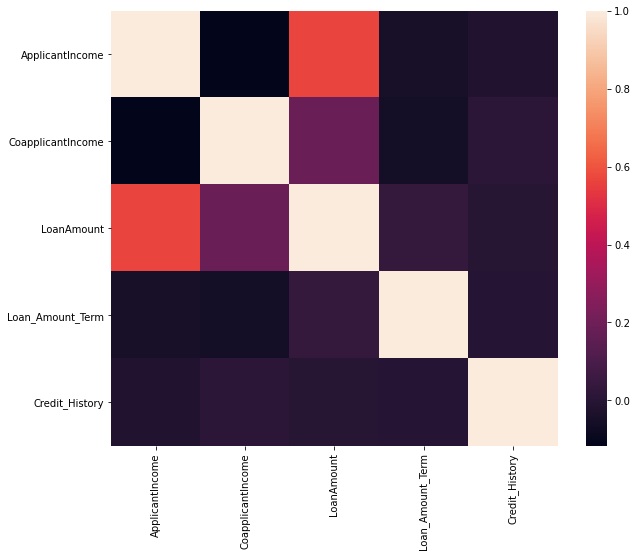




Correlation table : 
                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036475   
Credit_History           -0.018615           0.011134   -0.001431   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036475       -0.001431  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000  


In [14]:
corr = df_loan.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()
print('\n\n\nCorrelation table : \n',corr)

In [15]:
print('Percentage of Y  : %.2f' % (df_loan['Loan_Status'].value_counts()[0] / len(df_loan.loc[:,'Loan_Status'])))
print('Percentage of N  : %.2f' % (df_loan['Loan_Status'].value_counts()[1] / len(df_loan.loc[:,'Loan_Status'])))


Percentage of Y  : 0.69
Percentage of N  : 0.31


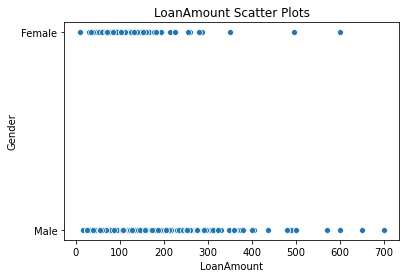

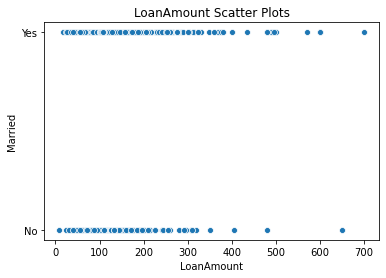

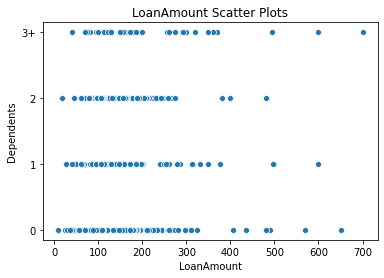

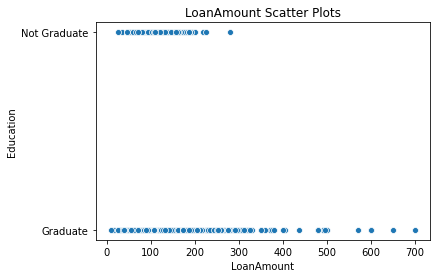

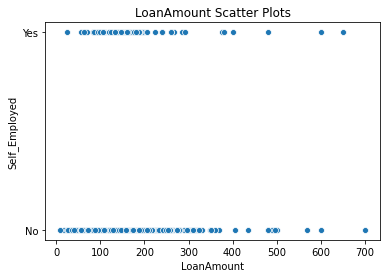

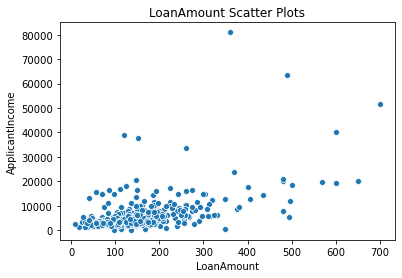

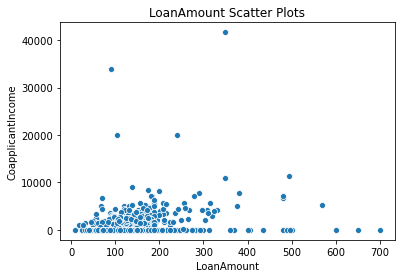

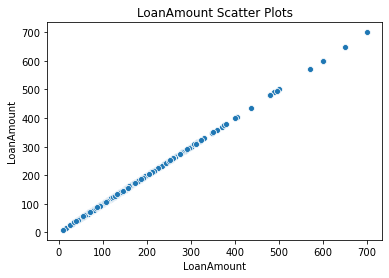

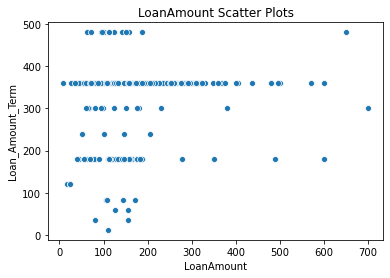

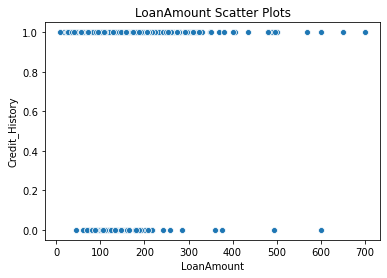

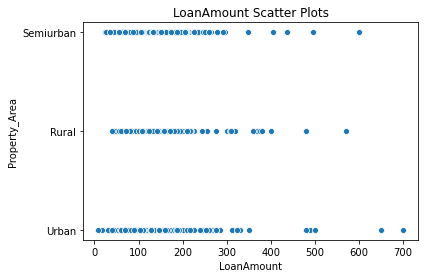

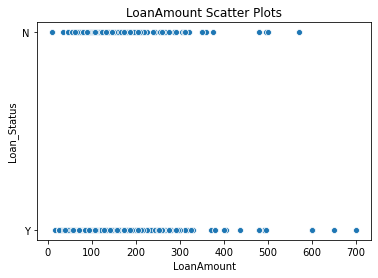

In [16]:
lst_cont = ['ApplicatIncome','CoapplicantIncome','Loan_Status']

for col in df_loan.columns:
    plt.title('LoanAmount Scatter Plots')
    sns.scatterplot(x = 'LoanAmount',y = col, data = df_loan)
    plt.show()

In [17]:
#1 Males are getting higher loan amounts than females
#2 Married couples are getting higher loan amounts than singles 
#3 Non graduate are getting very small amount loans only
#4 Self Employed people are not getting larger loans easily
#5 People with no credit history are getting less loans or no loans

In [18]:
for col in df_loan.columns:
    print('\n' ,col,'*************************************\nUnique values : ',df_loan.loc[:,col].unique(),'\n\n\nValue Counts : ',df_loan.loc[:,col].value_counts(),'\n\n\n')


 Gender *************************************
Unique values :  ['Male' 'Female'] 


Value Counts :  Male      502
Female    112
Name: Gender, dtype: int64 




 Married *************************************
Unique values :  ['No' 'Yes'] 


Value Counts :  Yes    401
No     213
Name: Married, dtype: int64 




 Dependents *************************************
Unique values :  ['0' '1' '2' '3+'] 


Value Counts :  0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 




 Education *************************************
Unique values :  ['Graduate' 'Not Graduate'] 


Value Counts :  Graduate        480
Not Graduate    134
Name: Education, dtype: int64 




 Self_Employed *************************************
Unique values :  ['No' 'Yes'] 


Value Counts :  No     532
Yes     82
Name: Self_Employed, dtype: int64 




 ApplicantIncome *************************************
Unique values :  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  185

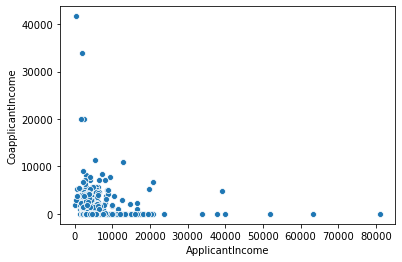

ApplicantIncome Mean :  5403.459283387622   CoapplicantIncome Mean :  1621.245798027101
ApplicantIncome Std :  6109.041673387174  Coapplicant Income Std :  2926.2483692241917
ApplicantIncome Total :  3317724  Coapplicant Income Total :  995444.9199886399


In [19]:
#ApplicantIncome vs CoapplicantIncome
sns.scatterplot(x = 'ApplicantIncome',y = 'CoapplicantIncome',data = df_loan)
plt.show()

print('ApplicantIncome Mean : ',df_loan.ApplicantIncome.mean(),'  CoapplicantIncome Mean : ',df_loan.CoapplicantIncome.mean())
print('ApplicantIncome Std : ',df_loan.ApplicantIncome.std(),' Coapplicant Income Std : ',df_loan.CoapplicantIncome.std())
print('ApplicantIncome Total : ',df_loan.ApplicantIncome.sum(),' Coapplicant Income Total : ',df_loan.CoapplicantIncome.sum())


#Applicants makes more  3 times money than coapplicants
#There are no cases where applicant and coapplicants both are making more than 20000 


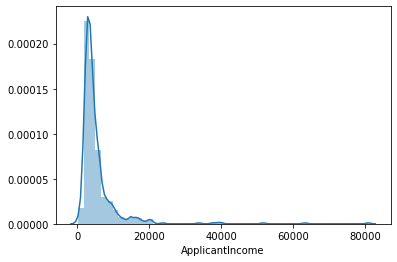

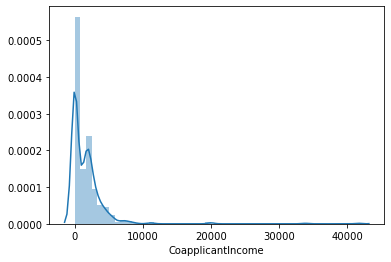

In [20]:
sns.distplot(df_loan.ApplicantIncome)
plt.show()
sns.distplot(df_loan.CoapplicantIncome)
plt.show()

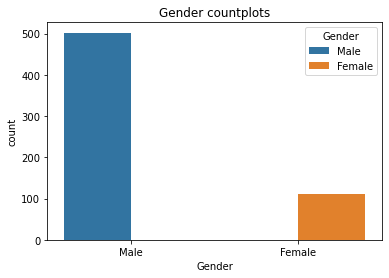

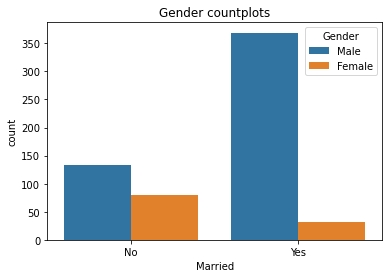

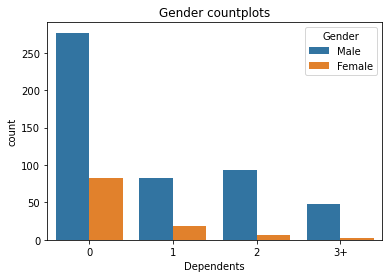

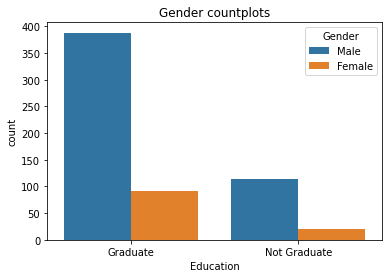

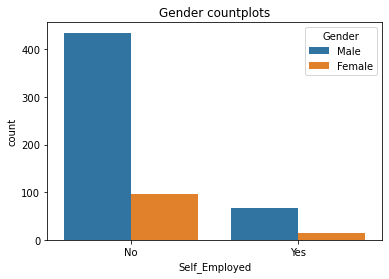

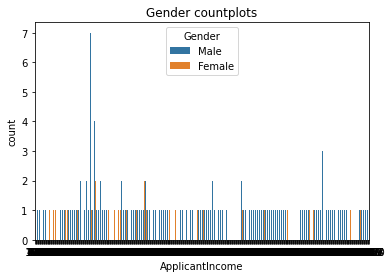

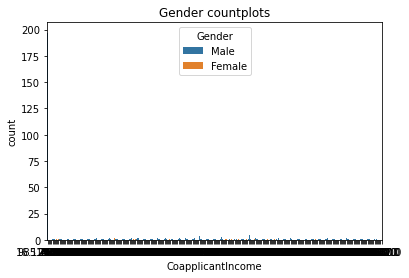

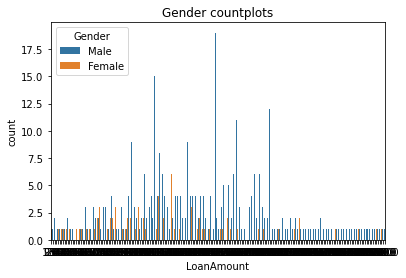

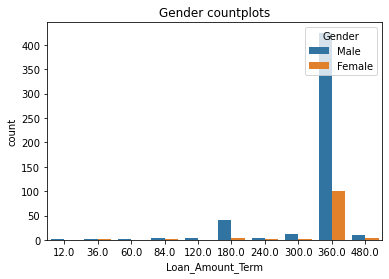

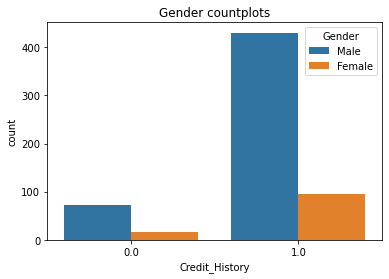

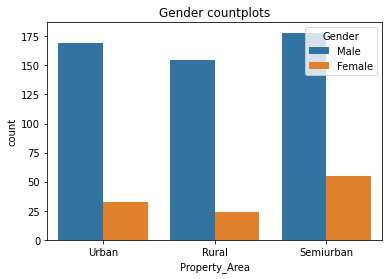

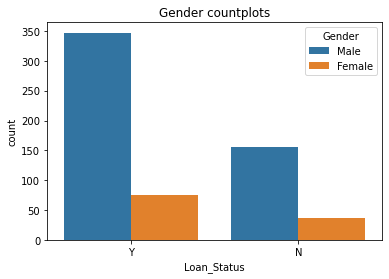

In [21]:
#Gender columns plots
for col in df_loan.columns:
    plt.title('Gender countplots')
    sns.countplot(x = col, hue = 'Gender', data = df_loan)
    plt.show()

In [22]:
#Less females have a self_employed status
#Almost all females have graduated from a college
#Majority of females have less dependents
#Males apply more for loans than females

In [23]:
#Now we will process and clean the data
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [24]:
df_loan.Loan_Amount_Term = df_loan.Loan_Amount_Term.astype('int64')

In [25]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
lst_cat = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Education','Property_Area','Loan_Status']
for i in lst_cat:
    df_loan.loc[:,i] = le.fit_transform(df_loan.loc[:,i])

In [28]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [29]:
#Checking and removing outliers
from scipy.stats import zscore 
z = np.abs(zscore(df_loan))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [30]:
df_new = df_loan[(z<3).all(axis=1)]
df_new
#Outliers removed so now we will now check for skewness

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,8,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,5,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,8,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,8,1.0,2,1


In [31]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [32]:
#1 -- Remove skewness in all 
#2 -- Remove skewness in only categorical columns and removing in all columns

x = df_new.iloc[:,:-1]
x

y = df_new.loc[:,'Loan_Status']

In [35]:
#with power transformer we will remove the skewness 

from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer()
for col in x.columns:
    if x.loc[:,col].skew() > 0.55 or x.loc[:,col].skew() < -0.55 :
        x[col] = pt.fit_transform(x[col].to_frame())

x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.520347
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [36]:
#Skewness not changed in -----

#--1 Gender
#--2 Married
#--3 Education
#--4 Self_Employed
#--5 ApplicantIncome
#--6 LoanAmount
#--7 Credit History
#--8 Loan_Status



In [37]:
#Since we have divided the data before gransformation we have to scale the data now 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for col in x.columns:
    x.loc[:,col] = sc.fit_transform(x.loc[:,col].to_frame())

In [38]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.144535,0.418513,1.227472
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.144535,0.418513,-1.306522
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.144535,0.418513,1.227472
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.144535,0.418513,1.227472
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.144535,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.144535,0.418513,-1.306522
610,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.532168,0.418513,-1.306522
611,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.144535,0.418513,1.227472
612,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.144535,0.418513,1.227472


In [39]:
#Now since the data is scaled and ready for use we shall proceed to finding the best model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state = 44)

In [42]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
   
    print(m,'\nAccuracy score : ',acc_score,'\n\n\n')
    
#Logistic Regression and SVC are having the best accuracy score

LogisticRegression() 
Accuracy score :  0.8137931034482758 



DecisionTreeClassifier() 
Accuracy score :  0.7034482758620689 



KNeighborsClassifier() 
Accuracy score :  0.7724137931034483 



RandomForestClassifier() 
Accuracy score :  0.7862068965517242 



SVC() 
Accuracy score :  0.8068965517241379 



GradientBoostingClassifier() 
Accuracy score :  0.7862068965517242 





In [43]:
#Let's check cross validation score
columns = [GradientBoostingClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(),KNeighborsClassifier()]

for col in columns:
    cvs = cross_val_score(m,x,y,cv=5,scoring='accuracy').mean()
    print('Cross validation score : ', cvs , 'for model : ',col)

Cross validation score :  0.7869415292353824 for model :  GradientBoostingClassifier()
Cross validation score :  0.7852173913043479 for model :  SVC()
Cross validation score :  0.7869415292353824 for model :  RandomForestClassifier()
Cross validation score :  0.7886656671664168 for model :  LogisticRegression()
Cross validation score :  0.7869415292353824 for model :  KNeighborsClassifier()


In [44]:
#KNN and SVC are giving best result compared to other models 
def grid_search(model,para):
    from sklearn.model_selection import GridSearchCV
    grd = GridSearchCV(model,para,cv=5,scoring='accuracy')
    grd.fit(x,y)
    return print('Best parameters for ',model,' are ',grd.best_params_,'for score ',grd.best_score_)

In [45]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()
params = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':list(range(50,560,100)),
    'loss':['exponential','deviance']
}

grid_search(gbc,params)

Best parameters for  GradientBoostingClassifier()  are  {'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 550} for score  0.8129085457271363


In [46]:
#logisticRegression
lreg = LogisticRegression()
params = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,10,25]
}
grid_search(lreg,params)

Best parameters for  LogisticRegression()  are  {'C': 1, 'penalty': 'l2'} for score  0.8198200899550224


In [47]:
import joblib 
joblib.dump(lreg,'Project9_Loan_Prediction.obj')

['Project9_Loan_Prediction.obj']